Missing Values Count:
Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64

Missing Values Percentage:
Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64


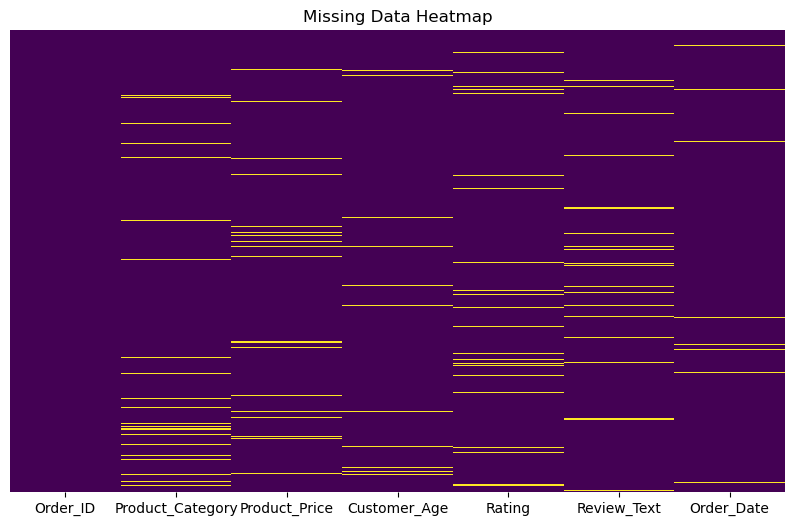


Summary Statistics Before Imputation:
         Order_ID  Product_Price  Customer_Age      Rating
count  505.000000     505.000000    505.000000  505.000000
mean   249.899010    2442.748515     42.194455    3.202772
std    144.769438    1387.499472     14.721617    1.122317
min      1.000000     108.000000     18.000000    1.000000
25%    124.000000    1292.000000     30.000000    2.400000
50%    250.000000    2464.000000     41.000000    3.000000
75%    375.000000    3588.000000     54.000000    4.000000
max    500.000000    4993.000000     69.000000    5.000000


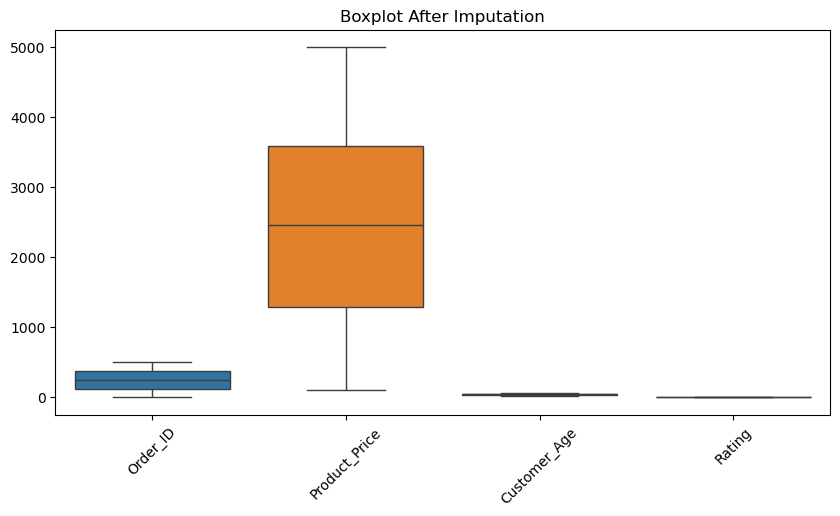

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings 
warnings .filterwarnings("ignore")

df = pd.read_csv('Day 19_E-Commerce_Data.csv')

missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values Count:")
print(missing_values)
print("\nMissing Values Percentage:")
print(missing_percentage)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

df['Product_Price'].fillna(df['Product_Price'].median(), inplace=True)

df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)

df['Order_Date'].fillna(method='ffill', inplace=True)

knn_imputer = KNNImputer(n_neighbors=5)
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

print("\nSummary Statistics Before Imputation:")
print(df.describe())

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot After Imputation")
plt.show()

df.to_csv('Day 19_Cleaned_E-Commerce_Data.csv', index=False)
